An insurance company wants to know the medical charges of patients (customers). Based on historical data, predictions will be made based on features provided in the data. This project will  start by importing necessary libraries and packages that will aid in exporting data, extracting statistical insight from the data, visualising the data and also help in buildin machine learning models that will help in predictions.
Exploratory Data Analysis will be done to further understand how the various characteristics of the data relate

# Table of content
#### Importing libraries and packages
1. Numpy, pandas, seaborn, matplotlib,sklearn,scipy


#### Importing Data
#### Exploratory Data Analysis
1. Distribution Analysis 
2. count plots
3. Bar charts
4. Boxplots
#### Detection and removal of outliers
#### Obtaining correlation between numerical variables
#### Encoding categorical variables
#### Seperating dependent variable from independent variables
#### Scaling data


### Modeling
1. Importing Machine Learning models
2. Splitting data into train set and test set
3. Training the model
4. Coefficients and Intercepts
5. Predicting test set


### Model Evaluation
1. ROOT MEAN SQAURE ERROR
2. EXPLAINED VARIANCE
3. Saving the model

### Importing libraries and packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import matplotlib.style as style
import scipy
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [2]:
pi = pd.read_csv('insurance.csv')    # pi  stands for patience insurance

In [3]:
pi.head()   # Displaying first five rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
pi.isnull().sum()    # Displaying the number of missing values in each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Displaying the number of missing values in each column. From the display above, it can be seen that there are no missing values in the data.


In [5]:
pi.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


info() method is a very important part of the data preparation process. It displays the columns, the number of null values in the columns and also the data types of each column. One interesting thing about this method is that, in most cases for example a column like age which is a numerical column might be represented by Dtype 'object'. This is more reason to look into the data to find out why. Most a times it will be because theres a stray character or a string present in the observations of the feature or column.
Fortunately that is not the case here.

In [6]:
pi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This describes numerical data by showing the mean, standard deviation, maximum and minimum values etc....

In [7]:
pi.describe(include ='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Including object in the describe function displays describes observations in categorical features

## Exploratory Analysis

<AxesSubplot:xlabel='charges'>

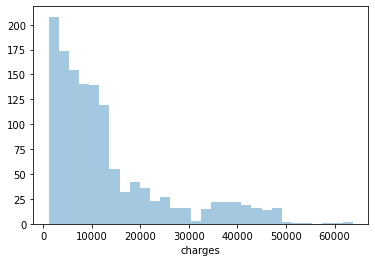

In [8]:
# checking the distribution of charges

sns.distplot(pi['charges'], kde = False)





from the above distribution plot it can be infered that the data is scewed to the right.
lets see how this can be changed by making it more of a bell shaped curve using log transformation

<AxesSubplot:xlabel='charges'>

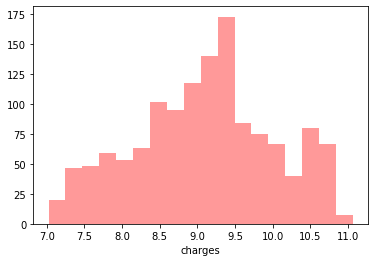

In [9]:
log_pi = np.log(pi['charges'])
sns.distplot(log_pi, kde = False, color = 'red')

Charges distribution looks better now

In [10]:
pi.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

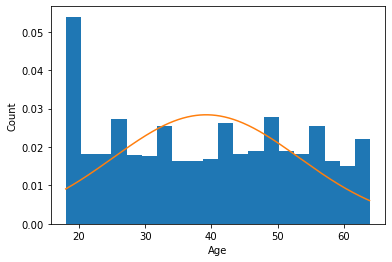

In [11]:
plt.hist(pi.age, bins = 20, rwidth = 20, density = True)
plt.xlabel('Age')
plt.ylabel("Count")


rng = np.arange(pi.age.min(), pi.age.max(), 0.1)
plt.plot(rng, norm.pdf(rng,pi.age.mean(), pi.age.std()))


In [12]:
pi.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

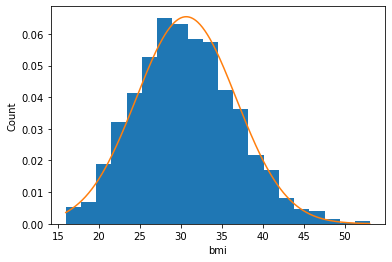

In [13]:
plt.hist(pi.bmi, bins = 20, rwidth = 20, density = True)
plt.xlabel('bmi')
plt.ylabel("Count")


rng = np.arange(pi.bmi.min(), pi.bmi.max(), 0.1)
plt.plot(rng, norm.pdf(rng,pi.bmi.mean(), pi.bmi.std()))

Majority of patience have bmis between 25 to 35

Now this looks more of a normal distribution than the first plot.



### Detecting and removing outliers using the standard deviation method

In [14]:
# detecting and removing outliers in age column
# the mean of the age column and 3 standard deviations will be the upper limit 
upper_limit = pi.age.mean() + 2*pi.age.std()
print("UPPER LIMIT:",upper_limit)

lower_limit = pi.age.mean() - 2*pi.age.std()
print("LOWER LIMIT:",lower_limit)

UPPER LIMIT: 67.30694616949363
LOWER LIMIT: 11.107104652628944


Any data point beyond the 67 limit will be marked as an outlier

Any data point below this limit will be marked as an outlier

In [15]:
pi[(pi.age > upper_limit) | (pi.age < lower_limit)]

,age,sex,bmi,children,smoker,region,charges


from the threshold i set for the outliers. it can be seen that all data points meet the required threshold. In other words, their no outliers in the age column.

In [16]:
#Detecting and removing outliers in bmi column
upper_limit_bmi = pi.bmi.mean() + 3* pi.bmi.std()
print("UPPER LIMIT:",upper_limit_bmi)

lower_limit_bmi = pi.bmi.mean() - 3 * pi.bmi.std()
print("LOWER LIMIT:", lower_limit_bmi)


UPPER LIMIT: 48.95795759602359
LOWER LIMIT: 12.368836125949485


A bmi below 12.36 and above 48.9 will be marked as an outlier

In [17]:
pi[(pi.bmi > upper_limit_bmi)|(pi.bmi < lower_limit_bmi)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


These are the data points that go beyond the upper limit or threshold set for outliers. These ones will be removed.

In [18]:
pi.no_out = pi[(pi.bmi < upper_limit_bmi) & (pi.bmi > lower_limit_bmi)]
pi.no_out.shape

(1334, 7)

In [19]:
pi.no_out.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
# Making age a categorical variable
pi['age'].sample(20)

689     27
575     58
383     35
26      63
1079    63
629     44
605     51
836     36
1171    43
763     27
1087    57
235     40
1064    29
343     63
1080    18
1232    54
1255    42
1218    46
130     59
613     34
Name: age, dtype: int64

In [21]:
pi['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

from age 18 - 35 will be grouped as young adults


from age 36- 55 will grouped as senior adults


from age 56 and above will be grouped as elder

Looking at the number of unique observations for the ages column. it will be complicated to represent each point on an axis. Therefore it will be categorized into 3 different categories.

In [22]:
# creating a new feature: age_cat
pi['age_cat'] = np.nan
lst = [pi.no_out]
for ages in lst:
    ages.loc[(ages['age'] >= 18) & (ages['age'] <= 35), 'age_cat'] = 'Young Adult'
    ages.loc[(ages['age'] > 35) & (ages['age'] <= 55), 'age_cat'] = 'Senior Adult'
    ages.loc[ages['age'] > 55, 'age_cat'] = 'Elder'

In [23]:
pi.no_out['age_cat'].head()

0    Young Adult
1    Young Adult
2    Young Adult
3    Young Adult
4    Young Adult
Name: age_cat, dtype: object

In [24]:
pi.no_out.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult


<AxesSubplot:title={'center':'AGE PROPORTION'}>

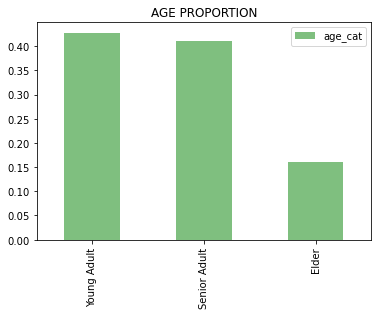

In [25]:
pi.no_out['age_cat'].value_counts(normalize = True).plot.bar(color = 'green', alpha = 0.5,
                                                      title = 'AGE PROPORTION',
                                                      legend = 'best')

From the above bar graph it can be infered that, Young Adults (43%), Senior Adults (41%) and Elder (16%)

In [26]:
minimum_bmi = pi.no_out['bmi'].min()
maximun_bmi = pi.no_out['bmi'].max()
print(minimum_bmi)
print(maximun_bmi)

15.96
48.07


In [27]:
pi['bmi_cat'] = np.nan
lst = [pi.no_out]
for bmis in lst:
    bmis.loc[(bmis['bmi'] < 18.5),'bmi_cat'] = 'Underweight'
    bmis.loc[(bmis['bmi'] >= 18.5) &  (bmis['bmi'] <= 24.9), 'bmi_cat'] = 'Healthy'
    bmis.loc[(bmis['bmi'] > 24.9) & (bmis['bmi'] < 30.0),'bmi_cat'] = 'Overweight'
    bmis.loc[(bmis['bmi'] >= 30.0),'bmi_cat'] = 'Obesse'

In [28]:
pi.no_out['bmi_cat'].unique()

array(['Overweight', 'Obesse', 'Healthy', 'Underweight'], dtype=object)

In [29]:
pi.no_out.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_cat', 'bmi_cat'],
      dtype='object')

<AxesSubplot:title={'center':'BMI PROPORTIONS'}>

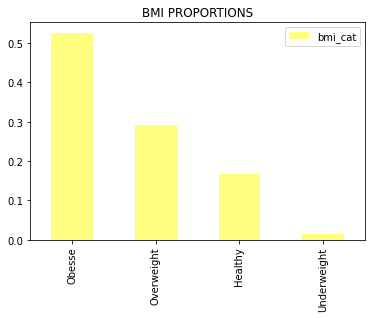

In [30]:
pi.no_out['bmi_cat'].value_counts(normalize = True).plot.bar(color = 'yellow', alpha = 0.5,
                                                      title = 'BMI PROPORTIONS',
                                                      legend = 'best')

It can be infered from the data that obese patients make more than 50% of the total number of patients. Representing the highest number of people in the dataset. While underweigth people represent less than 10% of the the total population of the dataset.

### Obtaining the correlation between numerical variables

In [31]:
numerical_variables = pi.no_out.select_dtypes(include = np.number)

In [32]:
cor = numerical_variables.corr().abs()

In [33]:
cor

,age,bmi,children,charges
age,1.000000,0.118887,0.042345,0.301360
bmi,0.118887,1.000000,0.018054,0.200799
children,0.042345,0.018054,1.000000,0.067569
charges,0.301360,0.200799,0.067569,1.000000


<AxesSubplot:>

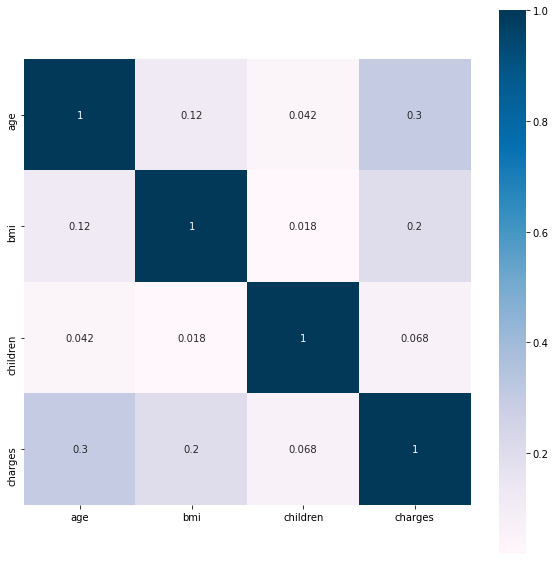

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(cor, vmax = 1, square = True, cmap = 'PuBu', annot = True)

Correlation states how the features are related to each other or the target variable
The most correlation is between charges and age with regards the heatmap above.
A correlation of 0.3 is not very significant.

In [35]:
pi.no_out['smoker'].sample(10)

350      no
1094     no
186      no
834      no
1028     no
809      no
1198     no
866      no
995      no
1042    yes
Name: smoker, dtype: object

<AxesSubplot:title={'center':'Smoker by proportion'}>

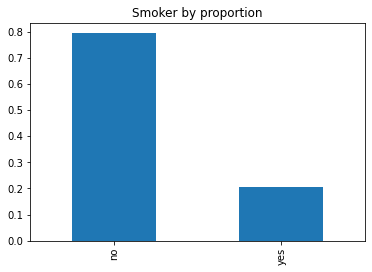

In [36]:
pi.no_out['smoker'].value_counts(normalize = True).plot.bar(title = 'Smoker by proportion')

From the above plot, about 80% of the patients are non-smokers and about 20% are smokers

Text(0.5, 1.0, 'Age over charges')

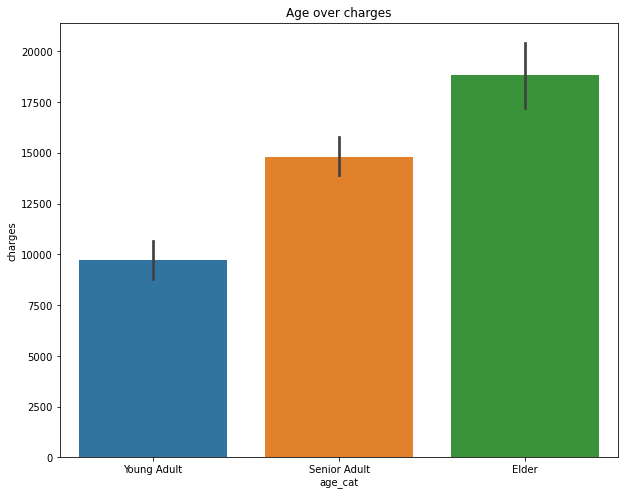

In [37]:
plt.figure(figsize=(10, 8))
sns.barplot(x='age_cat',y='charges',data=pi.no_out, orient = 'v')
plt.title('Age over charges')

From the data, young adults thus patients whose ages are from 18 - 35 were charged less compared to senior adults and elders. 
Comparing Senior Adults to Elders. It can be seen that Elders were charged more than senior adults.

From the above plot, it can be seen that people who smoked had higher charges than non-smokers

Text(0.5, 1.0, 'Age over bmi')

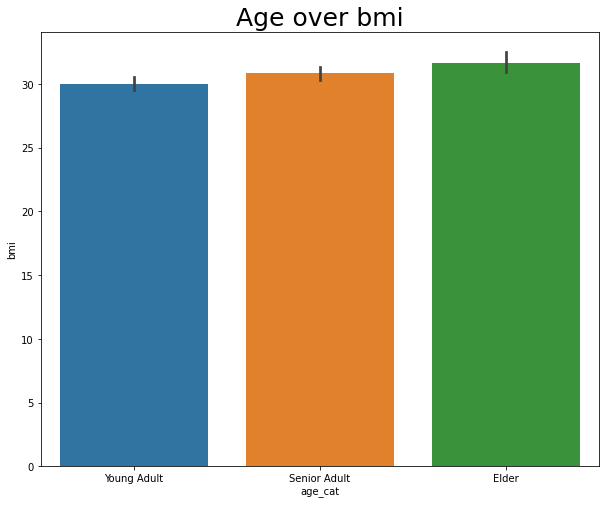

In [38]:
plt.figure(figsize=(10, 8))
sns.barplot(x='age_cat',y='bmi',data=pi.no_out, orient = 'v')

plt.title('Age over bmi', fontsize = 25)

There is not much difference in the bmis with regards to the different age groups.
But Elders have slightly bmis than senior adults and young adults


### Who got charged more on average

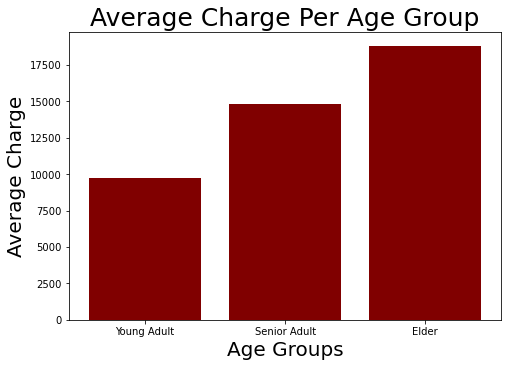

In [39]:
# average charge by age group
avg_ya = pi.no_out['charges'].loc[pi.no_out['age_cat']=='Young Adult'].mean()
avg_sa = pi.no_out['charges'].loc[pi.no_out['age_cat']=='Senior Adult'].mean()
avg_eld = pi.no_out['charges'].loc[pi.no_out['age_cat']=='Elder'].mean()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
average_charge = [avg_ya,avg_sa,avg_eld]
age_groups = ['Young Adult','Senior Adult','Elder']

ax.bar(age_groups,average_charge, color = 'maroon')
plt.xlabel('Age Groups', fontsize = 20)
plt.ylabel('Average Charge', fontsize = 20)
plt.title('Average Charge Per Age Group',fontsize = 25)
plt.show()


it can be infered from the above bar graph that elders where charged more on the average.
Exact figures will be displayed below

In [40]:
print('Average charges for young adults:{:.2f}'.format(avg_ya))
print('Average charges for senior adults:{:.2f}'.format(avg_sa))
print('Average charges for edlers: {:.2f}'.format(avg_eld))

Average charges for young adults:9711.43
Average charges for senior adults:14785.69
Average charges for edlers: 18830.48


In [41]:
pi.no_out.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obesse
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obesse
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


<AxesSubplot:xlabel='age', ylabel='charges'>

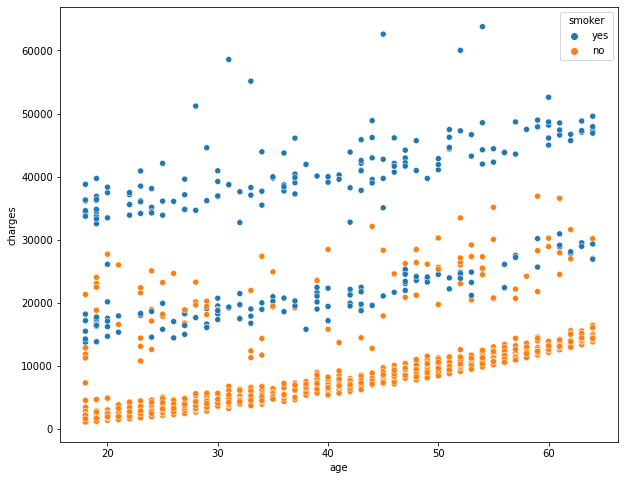

In [42]:
plt.figure(figsize = (10,8))
sns.scatterplot(pi.age,pi.charges, hue = pi.no_out.smoker, data = pi)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

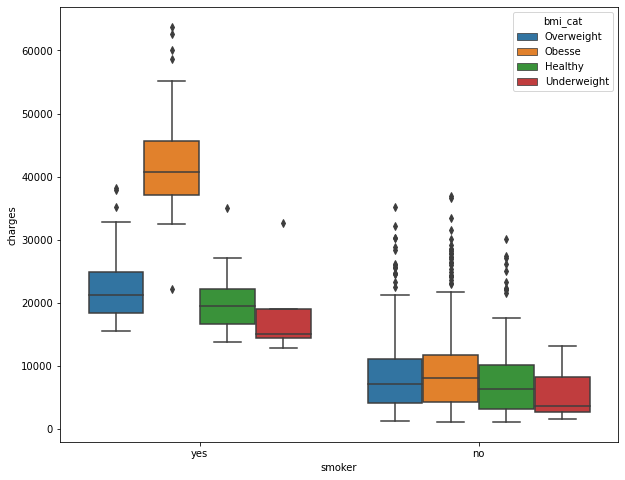

In [43]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'smoker', y = 'charges', data = pi.no_out, orient = 'v', hue= pi.no_out['bmi_cat'])

From the box plot, obese smokers are charged more than obese non smokers. Also, smokers in general are charged more than non smokers. From the smokers point of view, it can be seen that obese patients are charged more followed by overweight, healthy and underweight in that order. Same goes for the non-smokers

Text(0.5, 1.0, 'BMI')

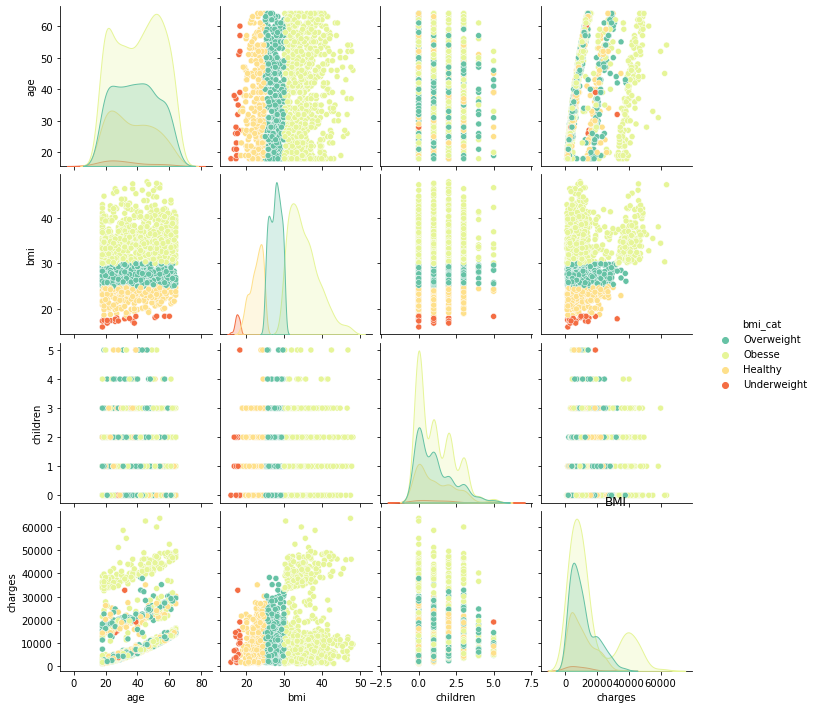

In [44]:
#sns.set(style = "ticks")
sns.pairplot(pi.no_out, hue="bmi_cat", palette='Spectral_r')
plt.title("BMI")

Text(0.5, 1.0, 'smokers and charges')

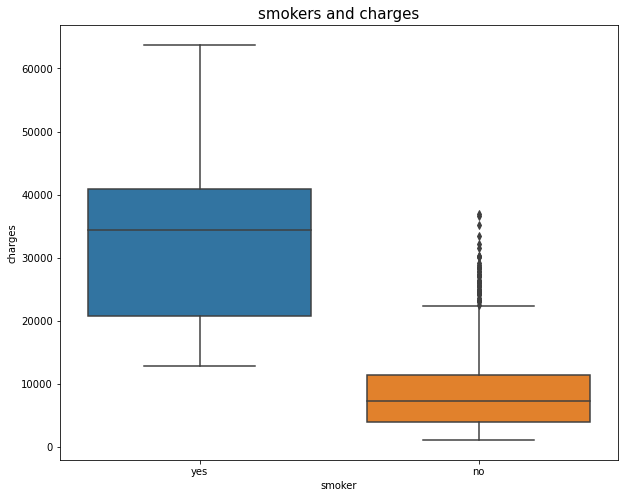

In [45]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='smoker',y='charges',data=pi.no_out, orient = 'v')
plt.title('smokers and charges',fontsize = 15)

From the boxplot above it can be seen that smokers were charged more than non-smokers

In [46]:
# AVERAGE CHARGES PER REGION
pi.no_out['region'].sample(15)

495     northeast
477     northwest
995     northeast
1315    northeast
803     southeast
1241    southeast
950     northeast
1089    southwest
162     southwest
193     northwest
615     southeast
899     northwest
585     southeast
415     southeast
593     northeast
Name: region, dtype: object

In [47]:
#northwest, northeast, southeast, southwest

ave_nw = pi.no_out['charges'].loc[pi['region']=='northwest'].mean()
ave_ne = pi.no_out['charges'].loc[pi['region']=='northeast'].mean()
ave_sw = pi.no_out['charges'].loc[pi['region']== 'southwest'].mean()
ave_se = pi.no_out['charges'].loc[pi['region']=='southeast'].mean()

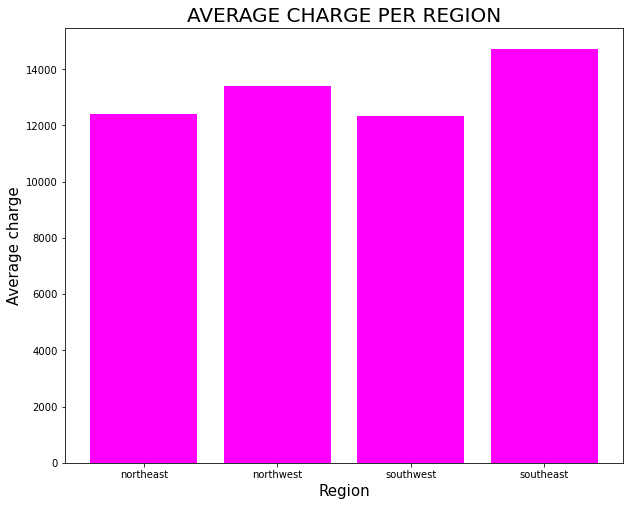

In [48]:
plt.figure(figsize = (10,8))

average_charge = [ave_nw,ave_ne,ave_sw,ave_se]
region = ['northeast','northwest','southwest','southeast']

plt.bar(region,average_charge,color= 'magenta')
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Average charge',fontsize = 15)
plt.title('AVERAGE CHARGE PER REGION',fontsize = 20)
plt.show()

In [49]:
print('Average charges for northeast:{:.2f}'.format(ave_ne))
print('Average charges for northwest:{:.2f}'.format(ave_nw))
print('Average charges for southwest: {:.2f}'.format(ave_sw))
print('Average charges for southeast: {:.2f}'.format(ave_se))

Average charges for northeast:13406.38
Average charges for northwest:12417.58
Average charges for southwest: 12346.94
Average charges for southeast: 14733.90


Patients from the southeast were charged more than patients from other regions

The age_cat and bmi_cat column will be dropped. Was only created to help in the analysis.



In [50]:
pi.no_out.drop('age_cat',axis = 1, inplace = True)

In [51]:
pi.no_out.drop('bmi_cat', axis = 1, inplace =True)

In [52]:
pi.no_out.drop("children", axis = 1, inplace = True)

In [53]:
pi.no_out.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


### Encoding Categorical Variables
Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step,


Categorical variables in this case are;
1. SEX
2. SMOKER
3. REGION


In [54]:
pi.no_out['sex'].replace(['male','female'],[0,1], inplace = True)  # 0 for males and 1 for females

In [55]:
pi.no_out['smoker'].replace(['yes','no'],[0,1], inplace = True)

In [56]:
pi.no_out["region"].replace(["northeast","northwest","southwest","southeast"],[0,1,2,3], inplace = True)

In [57]:
pi.no_out.head()

,age,sex,bmi,smoker,region,charges
0,19,1,27.900,0,2,16884.92400
1,18,0,33.770,1,3,1725.55230
2,28,0,33.000,1,3,4449.46200
3,33,0,22.705,1,1,21984.47061
4,32,0,28.880,1,1,3866.85520


### Seperating the dependent variable from the independent variables

In [58]:
X = pi.no_out.drop('charges',axis = 1)
y = pi.no_out['charges']

In [59]:
X.head()

,age,sex,bmi,smoker,region
0,19,1,27.900,0,2
1,18,0,33.770,1,3
2,28,0,33.000,1,3
3,33,0,22.705,1,1
4,32,0,28.880,1,1


In [60]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Scaling the independent variables
Feature scaling is a method used to normalize the range of independent variables or features of data

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_data = scaler.fit_transform(X)
X = pd.DataFrame(norm_data, columns = X.columns)

In [62]:
X.head()

,age,sex,bmi,smoker,region
0,-1.442249,1.007525,-0.450359,-1.971407,0.407142
1,-1.513528,-0.992532,0.528191,0.507252,1.293157
2,-0.800739,-0.992532,0.399829,0.507252,1.293157
3,-0.444344,-0.992532,-1.316383,0.507252,-0.478873
4,-0.515623,-0.992532,-0.286989,0.507252,-0.478873


In [63]:
print('shape of X:',X.shape)
print('shape of y:',y.shape)

shape of X: (1334, 5)
shape of y: (1334,)


### Importing machine learning models

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
X = np.array(X)
y = np.array(y)

### Splitting data into train and test sets

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [69]:
print("shape of X_train:", X_train.shape)
print("shape of y_train:", y_train.shape)

shape of X_train: (933, 5)
shape of y_train: (933,)


In [70]:
print("shape of X_test:", X_test.shape)
print("shape of y_test:", y_test.shape)

shape of X_test: (401, 5)
shape of y_test: (401,)


### Training the model

In [71]:
lr = LinearRegression()
lr.fit(X_train,y_train)
#prediction = lr.predict(X_test)

LinearRegression()

### Coefficient and intercepts

In [72]:
print ('Coefficients: ', lr.coef_)

Coefficients:  [ 3714.45446494    35.78867044  2212.48451638 -9228.46764444
  -371.83201661]


regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

In [73]:
print("Intercept:", lr.intercept_)

Intercept: 13080.005735109426


#### Predicting the test set 

In [74]:
prediction = lr.predict(X_test)

In [75]:
print(prediction)

[11896.96869899 10930.63681468  2541.65329054  2913.4353455
  7994.81642924  7593.84292338 38727.50682369 11878.35711313
  6170.36078895 34874.06991021  2153.42084378 12342.48427781
 37189.74653813  3550.88480503  5096.44832051  5628.07252039
 40068.22637802 10324.59459867  7634.44281676 24951.69472986
  8141.86425158  8425.18201502 32452.90545123 27241.04315635
  8533.50302505 28782.43713043  2161.61830558 12010.45182565
  6843.70208131 29773.62184945 30429.31385857  3129.36962297
  9370.66152734 31910.32973721  1322.90330731  5488.73742309
  5505.53400891 13118.70009637  3209.17932225 34790.48838776
 10681.61935529  8181.84121618 27314.38485516 39323.2197868
  3651.28877646 14349.70681003 22790.18921614 15512.28286392
 10867.67963487  8896.2917241   4861.64528432  7903.033295
  8116.95461358 16038.65879828  5794.89593199  5799.49192314
 10864.78637226  8015.07460788  9813.11389522 33302.63224938
 29817.7118116  10312.99081017 11527.74247806 26539.33303999
  9712.82240128  3732.915421

#### Root mean sqaured error

In [76]:
mse = np.mean((y_test-prediction)**2)
rmse = np.sqrt(mse)

print("RMSE:",rmse)

RMSE: 5764.371041135561


#### Explained Variance

In [77]:
#Explained variance score: 1 is perfect prediction
explained_variance = lr.score(X_test, y_test)
print('Variance score:' , (explained_variance))

Variance score: 0.7963600647481515


The explained variance is the difference between the expected value and the predicted value. it is the proportion of the variability of the difference between the actual samples of the dataset and the predictions made by the model.
Using regression analysis, it was possible to set up a predictive model using the independent variables provided in the dataset to explain 79% of the variance of the patient charges.

### Saving model using pickle

In [78]:
import pickle

In [79]:
with open("model_pickle","wb") as f:
    pickle.dump(lr,f)